In [1]:
import numpy as np
import scipy as sp
import scipy.optimize as fit
import matplotlib.pyplot as plt
import tikzplotlib as tikz

In [2]:
mu0 = 1.2566370614 * 10 ** (-6)

In [3]:
def T(n, x):
    return np.cos(n * np.arccos(x))

In [4]:
def print_err(a, a_err):
    print(np.round(a, decimals = 1 + round(abs(np.log10(a_err)))),
    '\pm', np.round(a_err, decimals = 1 + round(abs(np.log10(a_err)))))

Усттановка

In [5]:
R0 = 0.3
Ru = 20 * 10 ** 3
Cu = 20 * 10 ** (-6)
X_err = Y_err = 0.1
A_err = V_err = 0.1 / 1000

Феррит

    Коэффициенты

In [6]:
I = 179.4 / 1000
x2 = 8
Kx = 2 ** (3 / 2) * R0 * I / x2
Kx_err = Kx * ((A_err / I) ** 2 + (X_err / x2) ** 2) ** 0.5
U = 34.3 / 1000
y2 = 5
Ky = 2 ** (3 / 2) * U / y2
Ky_err = Ky * ((V_err / U) ** 2 + (Y_err / y2) ** 2) ** 0.5
print_err(Kx, Kx_err)
print_err(Ky, Ky_err)

0.01903 \pm 0.00024
0.0194 \pm 0.0004


    Значения

In [7]:
N0 = 40
N = 400
C = 0.25
S = 0.0003
X = np.array([-4.0, -3.3, -2.7, -2.0, -1.6, -0.9, -0.5, -0.4, 0.0, 0.4, 0.6, 1.0, 1.6, 2.0, 2.7, 3.3, 4.0])
Y = np.array([-2.3, -2.1, -2.0, -1.7, -1.4, -0.9, -0.4, -0.3, 0.0, 0.2, 0.3, 0.8, 1.3, 1.5, 1.8, 2.0, 2.1])
Hs = ((X[X.size - 1] - X[0]) / 2) * (Kx / R0) * (N0 / C)
Hs_err = Hs * Kx_err / Kx
Bs = ((Y[Y.size - 1] - Y[0]) / 2) * Ky * Ru * Cu / (N * S)
Bs_err = Bs * Ky_err / Ky
Hc = (1.3 / 2) * (Kx / R0) * (N0 / C)
Hc_err = Hc * Kx_err / Kx
Br = (1.9 / 2) * Ky * Ru * Cu / (N * S)
Br_err = Br * Ky_err / Ky
print_err(Hs, Hs_err)
print_err(Bs, Bs_err)
print_err(Hc, Hc_err)
print_err(Br, Br_err)

40.6 \pm 0.5
0.1423 \pm 0.0029
6.6 \pm 0.08
0.0614 \pm 0.0012


    Фитирование

In [8]:
def func(x, p0, p1):
    k = 2  / (X[X.size - 1] - X[0])
    y = k * x
    return p0 * np.tanh(p1 * x)

2.467 \pm 0.018
0.3686 \pm 0.0013


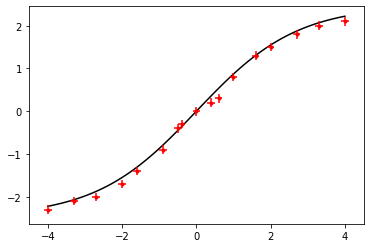

In [9]:
k, err = fit.curve_fit(func, X, Y)
x = np.linspace(X[0], X[X.size - 1], 100)
plt.plot(x, func(x, k[0], k[1]), 'black')
plt.errorbar(X, Y, Y_err, X_err, fmt = '.', color = 'red')
#tikz.save("tex/fer_plot.tex")
for i in range(k.size):
    print_err(k[i], err[i][i])

    Намагничиваемость

In [10]:
def der(x, *p):
    k = 2  / (X[X.size - 1] - X[0])
    return p[0] * p[1] / np.cosh(p[1] * x)

In [11]:
print_err(der(0, *k), der(0, *k) * 0.01)
print_err((Ru * Cu / S / N * Ky) / (N0 * Kx / C / R0) * der(0, *k) / mu0,
    0.05 * (Ru * Cu / S / N * Ky) / (N0 * Kx / C / R0) * der(0, *k) / mu0)

0.909 \pm 0.009
4611.168 \pm 230.558


Пермалой

    Коэффициенты

In [12]:
I = 452 / 1000
x2 = 8
Kx = 2 ** (3 / 2) * R0 * I / x2
Kx_err = Kx * ((A_err / I) ** 2 + (X_err / x2) ** 2) ** 0.5
U = 160 / 1000
y2 = 4.8
Ky = 2 ** (3 / 2) * U / y2
Ky_err = Ky * ((V_err / U) ** 2 + (Y_err / y2) ** 2) ** 0.5
print_err(Kx, Kx_err)
print_err(Ky, Ky_err)

0.0479 \pm 0.0006
0.0943 \pm 0.002


    Значения

In [13]:
N0 = 35
N = 220
C = 0.24
S = 0.00038
X = np.array([-2.5, -1.8, -1.4, -1.0, -0.8, -0.6, -0.4, 0, 0.4, 0.7, 0.8, 1.0, 1.4, 1.9, 2.5])
Y = np.array([-2.4, -2.3, -2.1, -1.7, -1.0, -0.3, -0.1, 0, 0.1, 0.2, 0.9, 1.5, 2.0, 2.1, 2.2])
Hs = ((X[X.size - 1] - X[0]) / 2) * (Kx / R0) * (N0 / C)
Hs_err = Hs * Kx_err
Bs = ((Y[Y.size - 1] - Y[0]) / 2) * Ky * Ru * Cu / (N * S)
Bs_err = Bs * Ky_err
Hc = (2.2 / 2) * (Kx / R0) * (N0 / C)
Hc_err = Hc * Kx_err
Br = (4.4 / 2) * Ky * Ru * Cu / (N * S)
Br_err = Br * Ky_err
print_err(Hs, Hs_err)
print_err(Bs, Bs_err)
print_err(Hc, Hc_err)
print_err(Br, Br_err)

58.26 \pm 0.03
1.0375 \pm 0.002
25.636 \pm 0.015
0.9924 \pm 0.002


    Фитирование

In [14]:
def func(x, p0, p1, p2):
    y = 2 * x / (X[X.size - 1] - X[0])
    return p0 * np.tanh(p1 * x ** 5) + p2 * T(1, y)

1.766 \pm 0.029
1.146 \pm 0.017
0.54 \pm 0.05


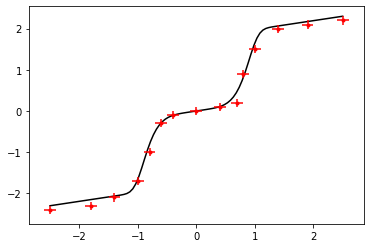

In [15]:
k, err = fit.curve_fit(func, X, Y)
x = np.linspace(X[0], X[X.size - 1], 100)
plt.plot(x, func(x, k[0], k[1], k[2]), 'black')
plt.errorbar(X, Y, Y_err, X_err, fmt = '.', color = 'red')
#tikz.save("tex/per_plot.tex")
for i in range(k.size):
    print_err(k[i], err[i][i])

    Намагничиваемость

In [16]:
def der(x, *p):
    k = 2  / (X[X.size - 1] - X[0])
    return 5 * p[0] * p[1] * x ** 4 / np.cosh(p[1] * x) + p[2] * k

In [17]:
def der2(x, p0, p1, p2):
    k = 2  / (X[X.size - 1] - X[0])
    return -20 * (5 * p0 * p1 ** 2 * x ** 8 * np.tanh(p1 * x ** 5) - 2 * p0 * p1 * x ** 3) / (np.cosh(2 * (p1 * x ** 5)) + 1)

In [18]:
print_err(der(0, *k), der(0, *k) * 0.1)
print_err((Ru * Cu / S / N * Ky) / (N0 * Kx / C / R0) * der(0, *k) / mu0,
    0.1 * (Ru * Cu / S / N * Ky) / (N0 * Kx / C / R0) * der(0, *k) / mu0)
x1 = fit.root(der2, -1, (k[0], k[1], k[2]))
x2 = fit.root(der2, 1, (k[0], k[1], k[2]))
print_err(der(x1.x[0], *k), der(x1.x[0], *k) * 0.1)
print_err((Ru * Cu / S / N * Ky) / (N0 * Kx / C / R0) * der(x1.x[0], *k) / mu0,
    0.1 * (Ru * Cu / S / N * Ky) / (N0 * Kx / C / R0) * der(x1.x[0], *k) / mu0)
print_err(der(x1.x[0], *k), der(x1.x[0], *k) * 0.1)
print_err((Ru * Cu / S / N * Ky) / (N0 * Kx / C / R0) * der(x1.x[0], *k) / mu0,
    0.1 * (Ru * Cu / S / N * Ky) / (N0 * Kx / C / R0) * der(x1.x[0], *k) / mu0)

0.214 \pm 0.021
3298.9518 \pm 329.8952
4.4 \pm 0.4
68060.55526 \pm 6806.05553
4.4 \pm 0.4
68060.55526 \pm 6806.05553


Кремнистое железо

    Коэффициенты

In [19]:
I = 1327 / 1000
x2 = 6
Kx = 2 ** (3 / 2) * R0 * I / x2
Kx_err = Kx * ((A_err / I) ** 2 + (X_err / x2) ** 2) ** 0.5
U = 7.2 / 1000
y2 = 0.2
Ky = 2 ** (3 / 2) * U / y2
Ky_err = Ky * ((V_err / U) ** 2 + (Y_err / y2) ** 2) ** 0.5
print_err(Kx, Kx_err)
print_err(Ky, Ky_err)

0.1877 \pm 0.0031
0.1 \pm 0.05


    Значения

In [20]:
N0 = 40
N = 400
C = 0.1
S = 0.00012
X = np.array([-3.5, -3.0, -2.7, -2.4, -2.0, -1.7, -1.3, -1.0, -0.6, 0, 0.6, 1.0, 1.3, 1.7, 2.0, 2.4, 2.7, 3.0, 3.5])
Y = np.array([-2.9, -2.7, -2.6, -2.5, -2.3, -2.2, -2.0, -1.8, -1.4, 0, 1.4, 1.8, 2.0, 2.2, 2.3, 2.5, 2.6, 2.7, 2.9])
Hs = ((X[X.size - 1] - X[0]) / 2) * (Kx / R0) * (N0 / C)
Hs_err = Hs * Kx_err
Bs = ((Y[Y.size - 1] - Y[0]) / 2) * Ky * Ru * Cu / (N * S)
Bs_err = Bs * Ky_err
Hc = (0.6 / 2) * (Kx / R0) * (N0 / C)
Hc_err = Hc * Kx_err
Br = (2.1 / 2) * Ky * Ru * Cu / (N * S)
Br_err = Br * Ky_err
print_err(Hs, Hs_err)
print_err(Bs, Bs_err)
print_err(Hc, Hc_err)
print_err(Br, Br_err)

875.8 \pm 2.7
2.46 \pm 0.13
75.07 \pm 0.23
0.89 \pm 0.05


    Фитирование

In [21]:
def func(x, p0, p1, p2):
    y = 2 * x / (X[X.size - 1] - X[0])
    return p0 * np.tanh(p1 * x) + p2 * T(1, y)

1.53804 \pm 0.00023
1.6305 \pm 0.0012
1.368 \pm 0.0004


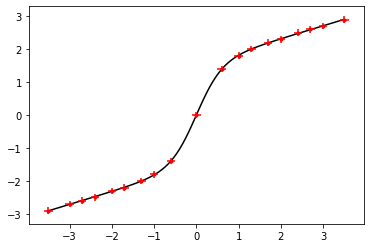

In [22]:
k, err = fit.curve_fit(func, X, Y)
x = np.linspace(X[0], X[X.size - 1], 100)
plt.plot(x, func(x, k[0], k[1], k[2]), 'black')
plt.errorbar(X, Y, Y_err, X_err, fmt = '.', color = 'red')
#tikz.save("tex/krem_plot.tex")
for i in range(k.size):
    print_err(k[i], err[i][i])

    Намагничиваемость

In [23]:
def der(x, *p):
    k = 2  / (X[X.size - 1] - X[0])
    return p[0] * p[1] / np.cosh(p[1] * x) + p[2] * k

In [24]:
print_err(der(0, *k), der(0, *k) * 0.001)
print_err((Ru * Cu / S / N * Ky) / (N0 * Kx / C / R0) * der(0, *k) / mu0,
    0.01 * (Ru * Cu / S / N * Ky) / (N0 * Kx / C / R0) * der(0, *k) / mu0)

2.8987 \pm 0.0029
7822.28 \pm 78.223
